In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("D:\machine learning\datasets\Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
samples = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

In [4]:
X = data[samples].values

In [5]:
Y = data['Species'].values

In [6]:
from sklearn.cluster import KMeans

In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = .3, random_state = 42)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


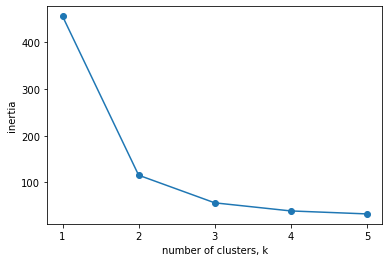

In [21]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(X_train)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [8]:
model = KMeans(n_clusters = 3)

In [9]:
model.fit(X_train)

KMeans(n_clusters=3)

In [10]:
labels = model.predict(X_test)

In [12]:
model.inertia_

56.47172957607216

In [15]:
#From the above graph we come to the conclusion that the optimum number of clusters is 3. 

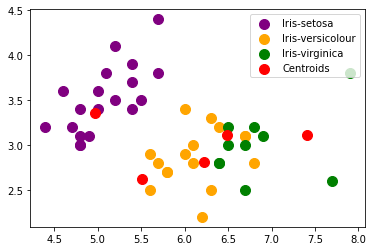

In [20]:
plt.scatter(X_test[labels == 0, 0], X_test[labels == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X_test[labels == 1, 0], X_test[labels == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X_test[labels == 2, 0], X_test[labels == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()